In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
print(train_images.shape)

(50000, 32, 32, 3)


In [5]:
print(train_images[0].dtype, train_images[0].shape)

uint8 (32, 32, 3)


In [6]:
print(train_labels.shape)

(50000, 1)


In [7]:
n = train_images.shape[0]
x = train_images[0].shape[0]
y = train_images[0].shape[1]
train_images_bw = np.zeros((n, x, y, 1), dtype=np.uint8)
print(train_images_bw.dtype, train_images_bw.shape)
n = test_images.shape[0]
x = test_images[0].shape[0]
y = test_images[0].shape[1]
test_images_bw = np.zeros((n, x, y, 1), dtype=np.uint8)
print(test_images_bw.dtype, test_images_bw.shape)

uint8 (50000, 32, 32, 1)
uint8 (10000, 32, 32, 1)


In [8]:
n = train_images.shape[0]
for x in range(n):
  img_color = train_images[x]    
  img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
  train_images_bw[x,:,:,0] = img_gray  

n = test_images.shape[0]
for x in range(n):
  img_color = test_images[x]    
  img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
  test_images_bw[x,:,:,0] = img_gray  

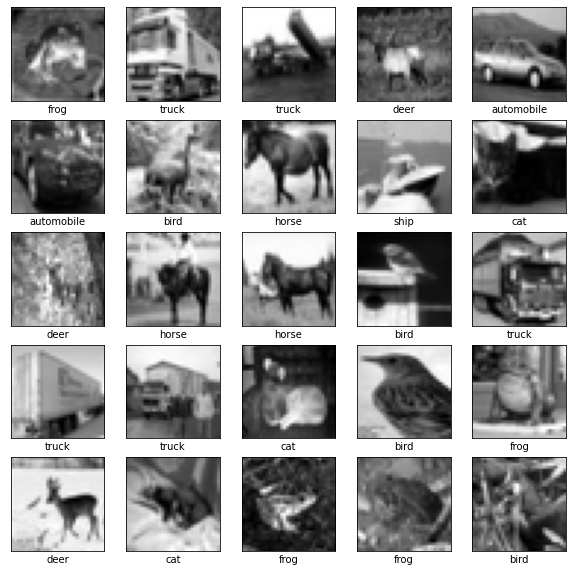

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    gray = train_images_bw[i]
    plt.imshow(gray[:,:,0], cmap = 'gray')
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

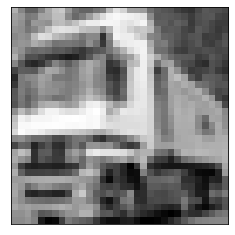

In [10]:
i = 1
plt.figure()
gray = train_images_bw[i]
plt.imshow(gray[:,:,0], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
print(train_images_bw[i].dtype, train_images_bw[i].shape)

uint8 (32, 32, 1)


In [12]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images_bw / 255.0, test_images_bw / 255.0
print(train_images.dtype, train_images.shape)
print(test_images.dtype, test_images.shape)

float64 (50000, 32, 32, 1)
float64 (10000, 32, 32, 1)


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 41s 817us/sample - loss: 1.6604 - accuracy: 0.4006 - val_loss: 1.3620 - val_accuracy: 0.5224
Epoch 2/10
50000/50000 [==============================] - 42s 833us/sample - loss: 1.2839 - accuracy: 0.5528 - val_loss: 1.2503 - val_accuracy: 0.5644
Epoch 3/10
50000/50000 [==============================] - 42s 840us/sample - loss: 1.1422 - accuracy: 0.6039 - val_loss: 1.1216 - val_accuracy: 0.6049
Epoch 4/10
50000/50000 [==============================] - 42s 842us/sample - loss: 1.0415 - accuracy: 0.6373 - val_loss: 1.0867 - val_accuracy: 0.6258
Epoch 5/10
50000/50000 [==============================] - 42s 843us/sample - loss: 0.9695 - accuracy: 0.6630 - val_loss: 1.0524 - val_accuracy: 0.6351
Epoch 6/10
50000/50000 [==============================] - 42s 848us/sample - loss: 0.9198 - accuracy: 0.6823 - val_loss: 0.9998 - val_accuracy: 0.6531
Epoch 7/10
50000/50000 [====================

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 0.9766 - accuracy: 0.6714


In [19]:
print('Test accuracy: {:5.2f}%'.format(100*test_acc))

Test accuracy: 67.14%


In [20]:
predictions = model.predict(test_images)

In [21]:
predictions.shape

(10000, 10)

In [22]:
predictions[0]

array([-2.1810284 , -1.7017736 ,  1.0074229 ,  4.6918983 , -0.2439245 ,
        2.6808615 ,  3.6365266 , -1.4245045 ,  2.032588  , -0.84741247],
      dtype=float32)

In [23]:
np.argmax(predictions[0])

3

In [24]:
test_labels[0][0]

3

In [25]:
test = test_labels.flatten()

In [26]:
pred = np.argmax(predictions, axis=1).astype(np.uint8)

In [27]:
tab = pd.crosstab(pred, test)
tab

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,711,23,96,46,44,26,16,30,63,42
1,13,800,6,10,10,3,10,7,24,70
2,70,8,545,99,70,94,38,45,18,6
3,12,6,72,455,62,191,46,53,8,16
4,11,8,89,70,569,52,26,53,2,1
5,5,3,35,96,20,464,8,38,2,6
6,20,30,92,122,127,78,822,18,12,17
7,7,4,26,33,66,64,3,711,6,11
8,113,39,25,36,22,17,20,13,848,42


In [28]:
tabn = tab.to_numpy()
tabm = np.asmatrix(tabn)
diago = np.sum(np.diag(tabm))
suma = np.sum(tabm)
acc =  diago/suma
print('Test accuracy: {:5.2f}%'.format(100*acc))

Test accuracy: 67.14%
